In [1]:
from fastai.vision.all import *
from fastai.vision.data import *
from fastai.vision.core import *
from fastai2_extensions.interpret.all import *
# from fastai.imports import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
path = Path('feb2021_abclass')

In [4]:
# vis_path = Path('visualizations_02-02-2021/round2')
# os.path.exists(vis_path)

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [7]:
data = ImageDataLoaders.from_folder(path, train='train', valid='val', 
                                  batch_tfms=[*aug_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.0, max_warp=0, p_affine=0),Normalize.from_stats(*imagenet_stats)],
                                  bs=32, 
                                  resize_method=ResizeMethod.Squish,
                                  size=(512, 512), num_workers=8) 

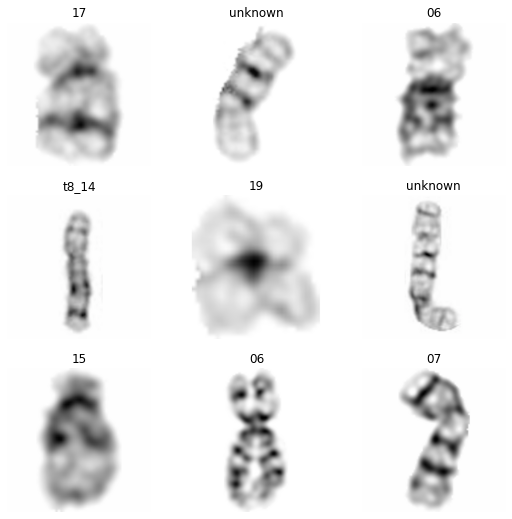

In [6]:
data.show_batch()

In [8]:
from fastai.metrics import error_rate, BalancedAccuracy, F1Score, RocAuc
f1_score = F1Score(average='weighted')
acc = BalancedAccuracy()

<h1><center style='background:orange'>vgg16 exp1</center></h1>

In [9]:
learn = cnn_learner(data, models.vgg16_bn, metrics=[error_rate, acc, f1_score])

In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [11]:
learn.recorder.summary()

Sequential (Input shape: 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 512 x 512 
Conv2d                                    1792       False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36928      False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 128 x 256 x 25 
Conv2d                                    73856      False     
BatchNorm2d                               256        True      
ReLU                                                           
Conv2d                                    147584     False     
BatchNorm2d                               

In [12]:
defaults.device = torch.device('cuda')

In [13]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,balanced_accuracy_score,f1_score,time
0,2.649527,1.944753,0.620805,0.404416,0.355799,03:40
1,1.751454,1.478914,0.463087,0.569516,0.523368,03:33
2,1.412815,1.404832,0.446309,0.570798,0.539997,03:33


SuggestedLRs(lr_min=3.981071586167673e-07, lr_steep=9.12010818865383e-07)

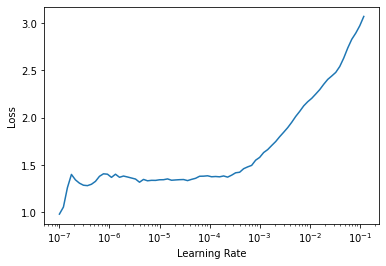

In [14]:
learn.unfreeze()
learn.lr_find()

In [15]:
learn.fit_one_cycle(5, slice(8e-5, 8e-4))

epoch,train_loss,valid_loss,error_rate,balanced_accuracy_score,f1_score,time
0,1.484196,2.607226,0.637584,0.383333,0.289326,04:49
1,1.023730,0.813588,0.238255,0.748148,0.753119,04:49
2,0.552654,0.452284,0.130872,0.855556,0.867188,04:49
3,0.285179,0.333665,0.110738,0.870655,0.891090,04:49
4,0.168506,0.306748,0.107383,0.867664,0.891965,04:49


In [16]:
learn.save('vgg16_exp1_bs32_is512_shortcycle_stage1.h5')

Path('feb2021_abclass/models/vgg16_exp1_bs32_is512_shortcycle_stage1.h5.pth')

<h1><center style='background:orange'>vgg16 exp2</center></h1>

In [9]:
learn = cnn_learner(data, models.vgg16_bn, metrics=[error_rate, acc, f1_score])

In [10]:
defaults.device = torch.device('cuda')

In [11]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,balanced_accuracy_score,f1_score,time
0,2.639292,1.910155,0.610738,0.413390,0.381464,03:40
1,1.684361,1.456181,0.459732,0.553704,0.529702,03:33
2,1.361353,1.314612,0.439597,0.568519,0.563473,03:33


SuggestedLRs(lr_min=2.511886486900039e-06, lr_steep=1.3182567499825382e-06)

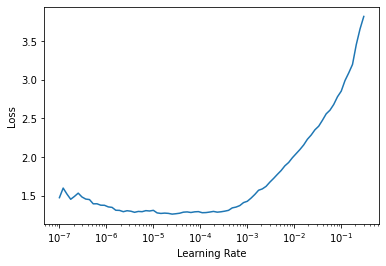

In [12]:
learn.unfreeze()
learn.lr_find()

In [13]:
learn.fit_one_cycle(5, slice(3e-6, 3e-5))

epoch,train_loss,valid_loss,error_rate,balanced_accuracy_score,f1_score,time
0,1.238966,1.290443,0.395973,0.610114,0.601254,04:51
1,1.131754,1.206414,0.385906,0.619943,0.611613,04:52
2,1.052701,1.124483,0.345638,0.652422,0.653808,04:52
3,0.972611,1.086349,0.322148,0.681909,0.677579,04:52
4,0.936540,1.078158,0.328859,0.669088,0.672290,04:52


In [14]:
learn.save('vgg16_exp2_bs32_is512_shortcycle_stage1.h5')

Path('feb2021_abclass/models/vgg16_exp2_bs32_is512_shortcycle_stage1.h5.pth')

<h1><center style='background:orange'>vgg16 exp3</center></h1>

In [9]:
learn = cnn_learner(data, models.vgg16_bn, metrics=[error_rate, acc, f1_score])

In [10]:
defaults.device = torch.device('cuda')

In [11]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,balanced_accuracy_score,f1_score,time
0,2.699429,1.948583,0.600671,0.435470,0.358776,03:40
1,1.758914,1.510769,0.489933,0.533903,0.490855,03:33
2,1.436535,1.372495,0.426174,0.585043,0.563513,03:33


SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=3.630780702224001e-05)

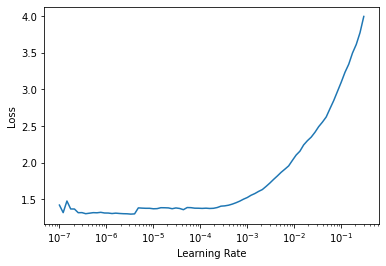

In [12]:
learn.unfreeze()
learn.lr_find()

In [13]:
learn.fit_one_cycle(5, slice(8e-5, 8e-4))

epoch,train_loss,valid_loss,error_rate,balanced_accuracy_score,f1_score,time
0,1.440393,1.532540,0.473154,0.510826,0.488023,04:51
1,0.998826,0.827773,0.271812,0.729202,0.726246,04:52
2,0.464910,0.455356,0.130872,0.851140,0.869887,04:52
3,0.284696,0.349746,0.117450,0.869373,0.882151,04:52
4,0.159047,0.288820,0.104027,0.883476,0.896153,04:52


In [14]:
learn.save('vgg16_exp3_bs32_is512_shortcycle_stage1.h5')

Path('feb2021_abclass/models/vgg16_exp3_bs32_is512_shortcycle_stage1.h5.pth')

In [1]:
import re

In [33]:
p = re.compile(r"00\d")

In [34]:
temp = ['abc123', 'abc001', 'abc009']

In [35]:
for item in temp:
    if re.search(p, item): 
        print(item)

abc001
abc009


In [36]:
a='ip2014'
a[-4:]

'2014'

In [37]:
import os

In [48]:
a = 'IP2014-01260'
ipyear, case_id = a.strip().split('-')

In [53]:
len(str(int(case_id)//25 *25 +1))

4

In [54]:
a.startswith('IP')

True

In [64]:
assert(os.path.exists('/User/andrew') == True)

AssertionError: 

In [66]:
a = ['13-0151 WILLIAMS', '13-0152 RAYSHELL']

In [67]:
for case in a: 
    year_id, _ = case.strip().split(' ')
    print(year_id)

13-0151
13-0152


In [73]:
case = [case for case in a if '0151' in case][0]
case

'13-0151 WILLIAMS'

In [74]:
assert(len(a) == 1)

AssertionError: 

In [ ]:
for root, dir_name, file_name in os.walk()